# Análisis y Reporte sobre el desempeño del modelo

En este archivo se analiza el [Student Marks Dataset](https://www.kaggle.com/datasets/yasserh/student-marks-dataset) disponible en Kaggle, publicado por Ing. M Yasser H. 

El dataset que se analizará cuenta con 3 columnas.
* number_courses: Número de cursos en los que el alumno en cuestión está enscrito actualmente. Consta de un número entero.
* time_study: Número de horas en promedio que el alumno dedica durante un día al estudio. Consta de un valor de punto flotante.
* Marks: Calificación obtenida por el alumno. Consta de un valor de punto flotante.

En este documento, se pretende hacer un análisis del sesgo, varianza y ajuste de diferentes modelos de regresión polinomial con la finalidad de encontrar el modelo que presente un mejor desempeño de los datos, con el objetivo de comprender la importancia y estrategias de tratamiento de las metricas previamente mencionadas.

También es importante reconocer la naturaleza del problema que se trata, en este caso, se busca realizar una **regresión** sobre los valores conocidos, ya que no trabajamos con categorías definidas, sino que trabajamos con un conjunto de datos de variables continuas, y nos interesa generar un modelo que tomen estas variables numericas (Tiempo de estudio y número de cursos) con la finaldiad de dar como respuestra otra variable númerica (Calificación). Se podría considerar clasificación si consideraramos que de cierta calificación hacia arriba los alumnos se clasifican como "aprovados" y de cierta calificación hacia abajo como "reprobados", pero este no es el caso, ya que solamente nos interesa conocer la calificación, no sus implicaciones.

## Préambulo
### Importación de librerías

In [94]:
# Librerías de uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Librerías para analisis de datos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

### Lectura del archivo csv

In [95]:
df = pd.read_csv('Student_Marks.csv')

### Exploración de datos

In [96]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


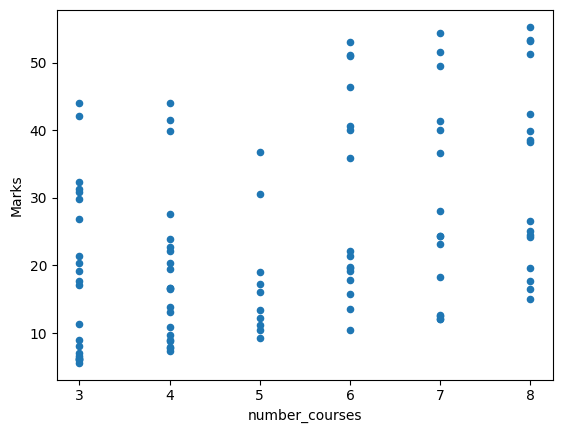

In [97]:
# Graficar el df como scatter plot
df.plot(x='number_courses', y='Marks', kind='scatter')  
plt.show()

En esta gráfica, se muestra el número de cursos contra las calificaciones del alumno. No es posible apreciar una coorrelacón fuerte entre estos datos, además de una leve dentencia hacia una mayor calificación dado un mayor número de cursos, pero no la suficiente como para considerar apropiada la inclusión de esta variable en el análisis.

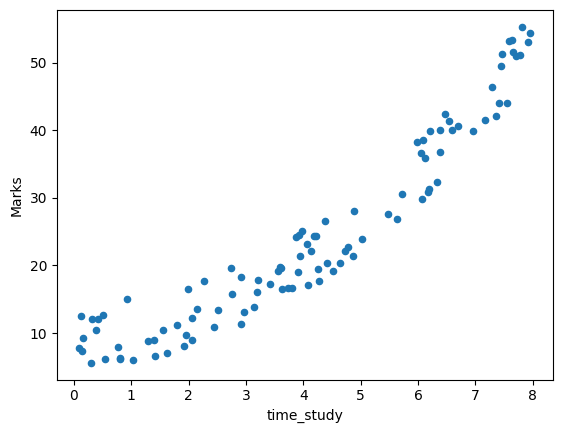

In [98]:
# Graficar el 'time_study' como scatter plot
df.plot(x='time_study', y='Marks', kind='scatter')  
plt.show()

A diferencia de el número de cursos, el tiempo de estudio parece estar fuertemente relacionado con las calificaciones del estudiante. Parece apreciarse una relación lineal, por lo que a continuación se aplicará un algoritmo de regresión lineal con la finalidad de generar un modelo que se ajuste al comportamiento de los datos.

### Partición de los datos

Se divide el conjunto de datos en tres subconjuntos para el entrenamiento, validación y prueba de los modelos generados. Con la finalidad de ser equitativo en las pruebas, se emplean los mismos subconjuntos de datos para todos los modelos generados.

Primero se divide el subconjunto de entrenamiento (70 % de los datos), posteriormente, se divide la fracción restrante de manera equitativa para crear los conjuntos de validación y prueba, contando cada uno con un 15% de los datos.

In [99]:
time_study = np.array(df["time_study"])
marks = np.array(df["Marks"])

# train_features, test_features, train_targets, test_targets = train_test_split(time_study, marks, test_size = 0.20, random_state = 42)
# train_features = train_features.reshape(-1, 1)
# test_features = test_features.reshape(-1, 1)

# Split into training, validation, and test sets
train_features, test_val_features, train_targets, test_val_targets = train_test_split(time_study, marks, test_size=0.30, random_state=42)

# Further split the test set into validation and test sets
val_features, test_features, val_targets, test_targets = train_test_split(test_val_features, test_val_targets, test_size=0.50, random_state=42)

# Reshape features if necessary
train_features = train_features.reshape(-1, 1)
val_features = val_features.reshape(-1, 1)
test_features = test_features.reshape(-1, 1)

## Rasgos del análisis 

### Sesgo

El sesgo (o bias) se refiere a la tendencia con la que el modelo comete errores al realiar predicciones sobre el conjunto de datos. El sesgo se introduce en el modelo como un producto de la simplifiación de problemas complejos en modelos "simples", el sesgo de un modelo nos habla sobre la manera en la que el modelo se equivoca en comparación a los datos observados, esto puede referirse a la tendencia a sobreestimar el valor real (sesgo de sobreestimación), a subestimar el valor real (sesgo de sobreestimación) o incluso hacer referencia a que el modelo empelado no es el adecuado para describir el comportamiento de los datos.

Un modelo con un sesgo alto puede conducir a problemas de *underfitting*, en los que el modelo es incapaz de realizar predicciones adecuadas sobre el conjunto de datos sin tomar en cuenta un alto margen de error.

### Varianza

La varianza se refiere al nivel de dependencia que tiene el modelo de los datos de entrenamiento. En terminos simples, un modelo con una alta varianza, tendrá un alto grado de dependencia de los datos de entrenamiendo, es decir, que el comportamiendo del modelo dependerá en gran medida de los datos que se utilicen para el entrenamiento. 

Es importante mantener un nivel razonable de varianza ya que los valores elevados de la misma pueden llevar a *overfitting*, es decir, un modelo se adhiere a los datos de entrenamiento pero arroja resultados poco satisfactorios cuando se validación sobre el subconjunto de validación.

### Nivel de ajuste del modelo

El nivel de ajuste al modelo se refiere a la capacidad del modelo de describir adecuadamente el comportamiento de los datos, incluyendo los conjuntos de validación y entrenamiento, sin caer en *underfitting* ni *overfitting*. Se busca encontrar un punto medio entre estos 2 estados que permita realizar predicciones con un margen de error satisfactorio sin ser excesivamente dependiente de los datos de entrenamiento. 

Para llegar a este punto se busca disminuir el bias lo máximo posible sin llegar a un valor de varianza elevado. A continuación se adjunta un diagrama que explica este concepto:

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8sV6Sr9uc0Ef39YBivLzrw.jpeg" alt="Image Description" height="350">
</p>

Es decir, se busca generar un modelo lo suficientemente complejo como para adaptarse a los datos, pero no lo suficientemente complejo como para ser incapaz de realizar predicciones de datos no vistos.

## Refinamiento de hiper-parametros

In [100]:
def plotModel(degrees=1, test=False):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_val_features = model_transform.transform(val_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    plt.figure(figsize=(6, 4))
    
    plt.scatter(val_features, val_targets, marker='.', label='Datos de validación', color="blue")
    plt.scatter(train_features, train_targets, marker='.', label='Datos de entrenamiento', color="green")
    if test:
        plt.scatter(test_features, test_targets, marker='.', label='Datos de prueba', color="violet")

    x_values = np.linspace(time_study.min(), time_study.max(), 100)

    plt.plot(x_values, model.predict(model_transform.transform(x_values.reshape(-1, 1))), color='red', label=f'Función Orden {degrees}', linewidth=1)

    model_mean_error_val = mean_error(val_targets, model.predict(model_val_features))
    model_mse_val = mean_squared_error(val_targets, model.predict(model_val_features))


    plt.text(0.98, 0.1, f'Error Medio Validación: {model_mean_error_val:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')
    plt.text(0.98, 0.05, f'MSE Validación: {model_mse_val:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')

    plt.xlabel('time_study')
    plt.ylabel('Marks')

    plt.legend()

    plt.show()

def mean_error(y, y_pred):
    return np.mean(y_pred - y)

def get_models_mse(degrees = 1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_val_features = model_transform.transform(val_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    model_predictions_train = model.predict(model_train_features)
    model_predictions_val = model.predict(model_val_features)

    model_mse_train = mean_squared_error(train_targets, model_predictions_train)
    model_mse_val = mean_squared_error(val_targets, model_predictions_val)

    return [model_mse_train, model_mse_val]

def get_models_mean_error(degrees = 1):
    model_transform = PolynomialFeatures(degree=degrees)
    model_train_features = model_transform.fit_transform(train_features)
    model_val_features = model_transform.transform(val_features)

    model = LinearRegression()

    model.fit(model_train_features, train_targets)

    model_predictions_train = model.predict(model_train_features)
    model_predictions_val = model.predict(model_val_features)

    model_mean_error_train = mean_error(train_targets, model_predictions_train)
    model_mean_error_val = mean_error(val_targets, model_predictions_val)

    return [model_mean_error_train, model_mean_error_val]

### Análisis de error medio

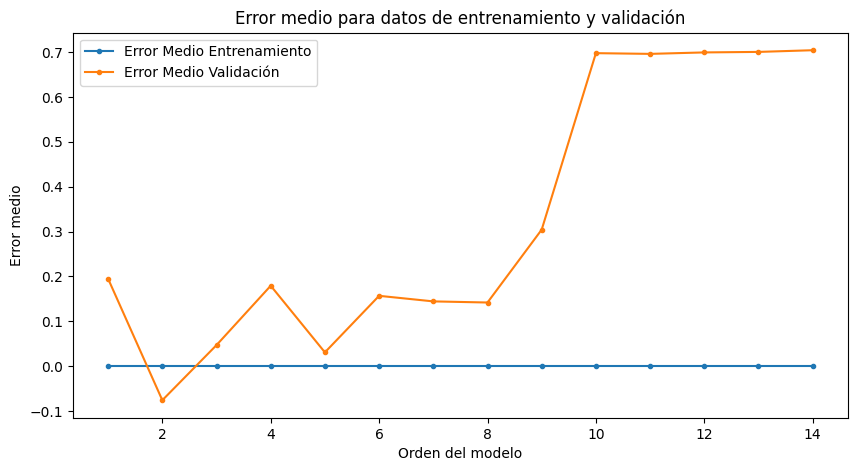

In [101]:
models_mean_error_train = []
models_mean_error_val = []
x = range(1, 15)
for i in x:
    model_mean_error = get_models_mean_error(i)
    models_mean_error_train.append(model_mean_error[0])
    models_mean_error_val.append(model_mean_error[1])

plt.figure(figsize=(10, 5))
plt.plot(x, models_mean_error_train, marker='.', linestyle='-', label='Error Medio Entrenamiento')
plt.plot(x, models_mean_error_val, marker='.', linestyle='-', label='Error Medio Validación')
plt.title('Error medio para datos de entrenamiento y validación')
plt.xlabel('Orden del modelo')
plt.ylabel('Error medio')
plt.legend()

# Display the plot
plt.show()

En esta gráfica, se calcula el error medio para modelos ponimiales entre los ordenes 1 y 14. Lo primero que llama la atención, es que el error medio de los datos de entrenamiento siempre es 0, ya que este es precisamente el objetivo del modelo, encontrar una ecuación polinomial que cancele los errores del conjunto de datos de entrenamiento. 

Lo que interesa en esta situación, es apreciar el comportamiento de los datos de validación. Podemos apreciar que, a grandes razgos, el modelo a mayor grado del modelo, este tiende a sobreestimar los datos del conjunto de validación, comportamiento que se vuelve evidente a partir del modelo de grado 9.

También es interesante señalar que el modelos de grado 2, tiende a subestimar el valor del conjunto de datos de validación.

Podemos encontrar un nivel de error medio aceptable entre los grados 2 y 9, en los que se encuentra cierto grado de sobreestimación (a excepción del modelo de grado 2). 

### Análisis de error cuadrático medio

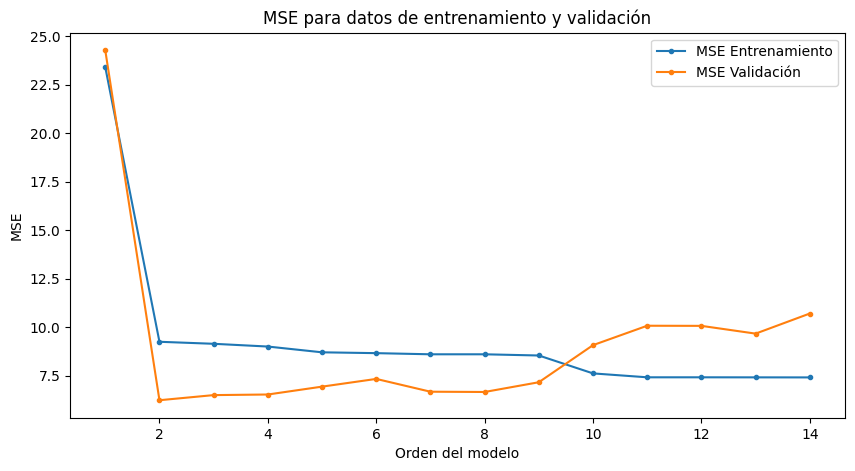

In [102]:
models_mse_train = []
models_mse_val = []
# models_mse_dif = []

x = range(1, 15)
for i in x:
    model_mse = get_models_mse(i)
    models_mse_train.append(model_mse[0])
    models_mse_val.append(model_mse[1])
    # models_mse_dif.append(np.abs(model_mse[1] - model_mse[0]))

plt.figure(figsize=(10, 5))
plt.plot(x, models_mse_train, marker='.', linestyle='-', label='MSE Entrenamiento')
plt.plot(x, models_mse_val, marker='.', linestyle='-', label='MSE Validación')
# plt.plot(x, models_mse_dif, marker='.', linestyle='-', label='Diferencia de MSE')
plt.title('MSE para datos de entrenamiento y validación')
plt.xlabel('Orden del modelo')
plt.ylabel('MSE')
plt.legend()

plt.show()

En este gráfico podemos apreciar el comportamiento del MSE a medida que aumenta la complejidad del modelo, en este caso, podemos apreciar como el MSE del subconjunto de entrenamiento declina progresivamente mientras aumenta la complejidad del modelo, mientras que el MSE del subconjunto de validación aumenta progresivamente en el mismo caso. Esto podría hablar de podencial overfitting cuando la complejidad del modelo excede el orden 9, resultando en una mala capacidad del modelo para generalizar a datos que no ha visto anteriormente. 

Esta gráfica también nos permite observar un claro underfit cuando el modelo consta de una regresión lineal, ya que el modelo no se logra ajustar ni al subconjunto de entrenamiento ni validación.

### Selección de grado grado del modelo

Tomando en cuenta las metricas anteriores, podemos estimar zonas de ajuste al modelo.

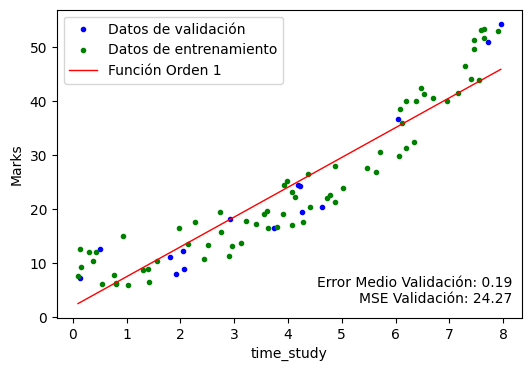

In [103]:
plotModel(1)

El modelo de orden 1, o lineal, resulta ser demasiado simple como para explicar de manera adecuada el comportamiento de los datos. Lo que resulta en un alto error cuadrático medio. Si bien el modelo muestra una similutud entre los errores cuadraticos medios de los conjuntos de entrenamiento y validación, el nivel que tiene de error previene que se le considere como la mejor alternativa. En resumen, tenemos un caso de underfitting.

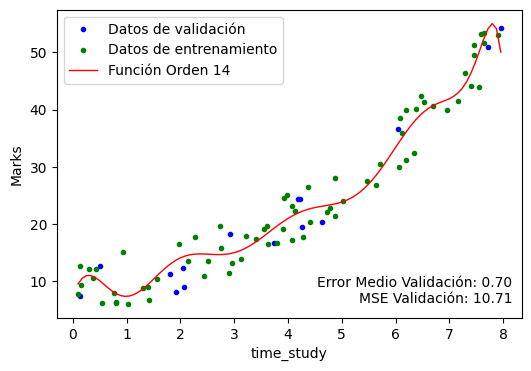

In [104]:
plotModel(14)

El modelo de orden 14 por otro lado, es un ejemplo de overfitting, ya que el modelo se ajusta a los datos de entrenamiento al punto de ser incapaz de generalizar a los datos de validación de manera satisfactoria. Si bien el error en el conjunto de entrenamiento es minimo, se deberían considerar otras opciones que sean capaces de adaptarse de manera más adecuada a los datos de validación.

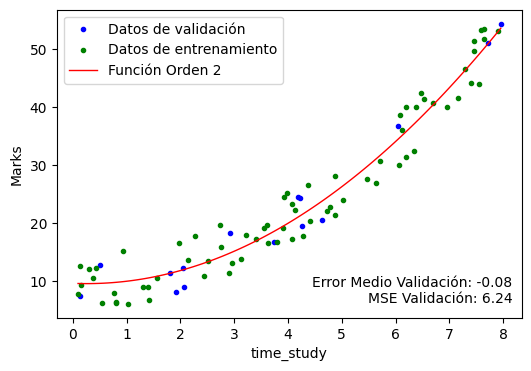

In [105]:
plotModel(2)

Nuestro modelo inicial de orden 2, resultó ser el modelo más apto al conseguir un equilibrio entre un error algo y una alta diferencia entre sus metricas de rendimiento con los subconjuntos de entrenamiento y validación, logrando un nivel de error aceptable pero siendo capaz de generalizar a los datos del conjunto de validación. Si bien no es el modelo que presenta lo mejores resultados, considero que es el más apropiado porque es el más simple de los modelos satisfactorios, y generalmente es preferible tener un modelo que tienda a lo simple que uno más complejo que se ajuste mejor a los datos.

Por lo tanto, tomaremos el modelo de **orden 2** como preferible para el refinamiento.



## Análisis de sesgo, varianza y ajuste

### Sesgo

Para calcular el sesgo del modelo seleccionado, debemos buscar de que manera el modelo comete errores de manera sistematica al momento de realizar predicciones sobre los datos. En el contexto de una regresión cuadratica como la que se seleccionó, podemos análisar esto con la matrica de error medio, y de este modo observar hacia donde tiene la media de errores.

Como se mencionó anteriormente, el algoritmo para llegar al modelo está diseñado de tal forma que la media de errores del conjunto de entrenamiento es 0, por lo que esto solo se puede realizar sobre un subconjunto diferente como el de validación.

Si regresamos por un momento a la gráficación del modelo de orden 2, se indica en la misma que el error medio para el conjunto de validación es de $-0.08$, lo cual indica un **muy bajo sesgo de sobreestimación**.

### Varianza

Para la varianza, buscamos explorar que tanto varía el resultado del modelo dependiendo de el conjunto de datos de entrenamiento. Por lo que se generarán 2 subconjuntos nuevos de entrenamiento, cada uno con la mitad de los datos, con la finalidad de observar como se comporta el modelo con diferentes subconjuntos de un mismo conjunto de datos.


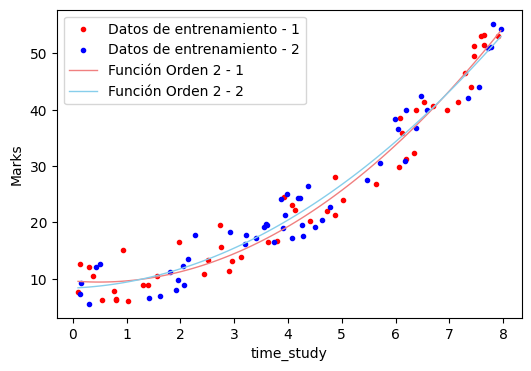

In [106]:
train_features_1, train_features_2, train_targets_1, train_targets_2 = train_test_split(time_study, marks, test_size=0.5, random_state=42)
train_features_1 = train_features_1.reshape(-1, 1)
train_features_2 = train_features_2.reshape(-1, 1)

model_transform = PolynomialFeatures(2)

model_1_train_features = model_transform.fit_transform(train_features_1)
model_2_train_features = model_transform.fit_transform(train_features_2)
# model_val_features = model_transform.transform(val_features)

quadratic_model_1 = LinearRegression()
quadratic_model_2 = LinearRegression()

quadratic_model_1.fit(model_1_train_features, train_targets_1)
quadratic_model_2.fit(model_2_train_features, train_targets_2)

plt.figure(figsize=(6, 4))

# plt.scatter(val_features, val_targets, marker='.', label='Datos de validación', color="blue")
plt.scatter(train_features_1, train_targets_1, marker='.', label='Datos de entrenamiento - 1', color = 'red')
plt.scatter(train_features_2, train_targets_2, marker='.', label='Datos de entrenamiento - 2', color = 'blue')

x_values = np.linspace(time_study.min(), time_study.max(), 100)

plt.plot(x_values, quadratic_model_1.predict(model_transform.transform(x_values.reshape(-1, 1))), color='lightcoral', label=f'Función Orden {2} - 1', linewidth=1)
plt.plot(x_values, quadratic_model_2.predict(model_transform.transform(x_values.reshape(-1, 1))), color='skyblue', label=f'Función Orden {2} - 2', linewidth=1)

# model_1_mse = mean_squared_error(train_targets_2, quadratic_model_1.predict(model_1_train_features))
# model_2_mse = mean_squared_error(train_targets_1, quadratic_model_2.predict(model_2_train_features))

# plt.text(0.98, 0.1, f'MSE - 1: {model_1_mse:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')
# plt.text(0.98, 0.05, f'MSE - 2: {model_2_mse:.2f}', transform=plt.gca().transAxes, fontsize=10, color='black', ha='right')

plt.xlabel('time_study')
plt.ylabel('Marks')

plt.legend()

plt.show()

En esta gráfica, podemos apreciar el resultado de partir nuestro dataset a la mitad, con la intención de observar cuanto cambia un modelo cuadratico dependiendo del conjunto de datos que se utilice para entrenarlo. Este experiemnto nos permite observar que independientemente de utilizar porciones diferentes del conjunto original, ambos modelos se muestran bastante similares en el rango que importa para el problema, con el *modelo 1* arrojando valores mayores que el *modelo 2* en los limites de la gráfica, y lo contrario para el centro de la gráfica.

Esta poca diferencia entre modelos, independientemente de la diferencia de sus conjuntos de entrenamiento, sirve como base para mí para afirmar que el modelo cuenta con una **baja varianza**.

### Nivel de ajuste

Finalmente, podemos afirmar con contundez que el modelo de orden 2 no llega a caer ni en *overfit* ni *underfit*, si no que se encuentra en un cómodo punto medio en el que resulta capaz de adaptarse correctamente a los datos de entrenamiento, y además generalizar a datos no vistos previamente, además sin mostrar un nivel de sesgo evidente hacía algún lado (subestimación o sobreestimación).

Finalmente, podemos incluir los datos de prueba en la gráfica, y apreciar que el modelo se ajusta correctamente con este último conjunto de datos.

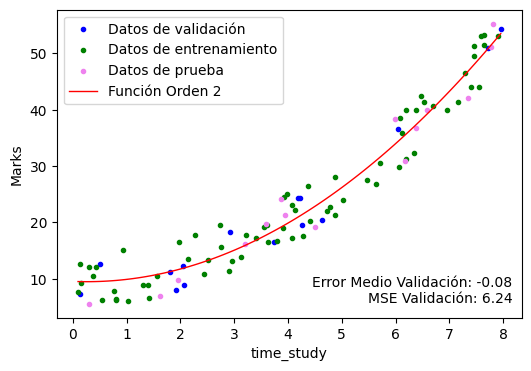

In [107]:
plotModel(degrees=2, test=True)

## Técnicas de regulariazción

Se investigó de manera breve técnicas de regularaización para modelos de regresión como el que tenemos en mente, sin embargo, se encontró que para metodos como minimos cuadrados las técnicas de regularización como Lasso, Ridge o Elastic Net podrían no ser útiles para mejorar el desempeño del modelo, ya que estos metodos funcionan para quitar coeficientes o variables consideradas como no relevantes para el modelo; sin embargo, al tratarse de una regresión cuadratica, solamente se cuentan con 3 terminos, la intercepción, el componente lineal, y el componenete cuadratico; la eliminación de cualquiera de estos componentes resultaría en la perdida de exactitud del modelo, por lo que considero como apropiado no aplicar ninguna termina de regularización por la naturaleza del problema.

## Conclusión

En conclusión, el modelo con el que iniciamos, una regresión polinomial de orden 2, resultó ser el modelo de mejor ajuste a nuestros datos. Sin embargo, analizar el desempeño de modelos de diferentes complejidades permitió reafirmar esta hipotesis con un mayor grado de seguridad, así como servir como un fructifero ejercicio en la comprensión del sesgo, varianza y ajuste de los modelos.

## Referencias

Kar, U. (2022, 6 enero). Concept of Machine learning | Polynomial regression | Errors: noise, bias, and variance | Splitting data into training and test set. Medium. https://medium.com/geekculture/concept-of-machine-learning-polynomial-regression-errors-noise-bias-and-variance-splitting-222193e2331f

Mottaghinejad, S. (2022, 7 enero). The intuition behind bias and variance - towards data science. Medium. https://towardsdatascience.com/bias-and-variance-but-what-are-they-really-ac539817e171

What is the difference between bias and variance? (2022, 19 julio). CORP-MIDS1 (MDS). https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/

Zvornicanin, E., & Zvornicanin, E. (2023). How to calculate the regularization parameter in linear regression | Baeldung on Computer Science. Baeldung on Computer Science. https://www.baeldung.com/cs/regularization-parameter-linear-regression#:~:text=There%20are%20three%20main%20techniques,Elastic%20Net